In [1]:
import numpy as np
import pandas as pd
import matplotlib
from pandas import Series, DataFrame

%matplotlib inline

In [2]:
Series([1,2,3])

0    1
1    2
2    3
dtype: int64

In [3]:
data = list(range(1, 11))

In [4]:
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
data * 2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
[n*2 for n in data]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [7]:
data2d = [[1, 2], [3, 4]]

In [8]:
new_data = []
for 행 in data2d:
    새행 = [n*2 for n in 행]
    new_data.append(새행)

In [9]:
new_data

[[2, 4], [6, 8]]

In [10]:
import numpy

In [11]:
arr2d = numpy.array(data2d)

In [12]:
type(arr2d)

numpy.ndarray

In [13]:
arr2d

array([[1, 2],
       [3, 4]])

In [14]:
arr2d * 2

array([[2, 4],
       [6, 8]])

행 선택

In [15]:
arr2d[0]

array([1, 2])

열 선택

In [16]:
arr2d[:, 0]

array([1, 3])

In [17]:
import pandas

In [18]:
arr2d = numpy.array(data2d)
arr2d

array([[1, 2],
       [3, 4]])

In [19]:
frame = pandas.DataFrame(data2d)
frame

,0,1
0,1,2
1,3,4


In [20]:
frame * 2

,0,1
0,2,4
1,6,8


# 1943 MCP 뉴런 

In [21]:
import numpy as np

In [22]:
x = np.array([0, 1])

In [23]:
w = np.array([0.5, 0.5])

In [24]:
b = -0.5

In [25]:
z = np.sum(w*x) + b
z

0.0

In [26]:
y = 1 if z > 0 else -1
y

-1

MCP 뉴런을 활용한 논리회로

In [27]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [28]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    z = np.sum(w*x) + b
    y = 1 if z > 0 else 0
    return y

In [29]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [30]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    z = np.sum(w*x) + b
    y = 1 if z > 0 else 0
    return y

In [31]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


In [32]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    z = np.sum(w*x) + b
    y = 1 if z > 0 else 0
    return y

In [33]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [34]:
x = np.array([1, 1])
w = np.array([0.5, 0.5])
b = -0.5

In [35]:
def net_input(x, w, b):
    return np.sum(w*x)+b

In [36]:
z = net_input(x, w, b)

In [37]:
z

0.5

In [38]:
def activation(z):
    return 1 if z > 0 else -1

In [39]:
y_pred = activation(z)

In [40]:
def 가중치갱신(y, y_pred, x):
    오류 = y - y_pred
    w_delta = 오류 * x
    return w_delta

In [41]:
x

array([1, 1])

정답과 예측값이 같은 경우

In [42]:
가중치갱신(y=1, y_pred=1, x=x)

array([0, 0])

In [43]:
가중치갱신(y=1, y_pred=-1, x=x)

array([2, 2])

In [44]:
def 학습(X, y, 반복=10, 학습률=0.1):
    w = np.array([0.] * X.shape[1])
    b = 0.
    
    error_history = []
    for i in range(반복):
        print('{} 번째 훈련 중 ...'.format(i))
        z = np.dot(X, w) + b
        y_pred = np.where(z > 0, 1, 0)
        
        error = y - y_pred
        sse = np.sum(error**2) # 오류의 제곱합
        error_history.append(sse)
        
        # 가중치 갱신
        w_delta = 학습률 * error
        w += np.dot(w_delta, X)
        b += np.sum(w_delta)
        
        print('{0}) w: {1}, b: {2}\tError: {3}'.format(
            i+1, w, b, sse))
    return w, b, error_history

In [45]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [46]:
y = np.array([0, 0, 0, 1])

In [47]:
w, b, error_history = 학습(X, y)

0 번째 훈련 중 ...
1) w: [ 0.1  0.1], b: 0.1	Error: 1
1 번째 훈련 중 ...
2) w: [ 0.  0.], b: -0.20000000000000004	Error: 3
2 번째 훈련 중 ...
3) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 1
3 번째 훈련 중 ...
4) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0
4 번째 훈련 중 ...
5) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0
5 번째 훈련 중 ...
6) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0
6 번째 훈련 중 ...
7) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0
7 번째 훈련 중 ...
8) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0
8 번째 훈련 중 ...
9) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0
9 번째 훈련 중 ...
10) w: [ 0.1  0.1], b: -0.10000000000000003	Error: 0


In [48]:
def 로직게이트_만들기(w, b):
    def logic_gate(x1, x2):
        x = np.array([x1, x2])
        z = np.sum(w*x) + b
        y = 1 if z > 0 else 0
        return y
    return logic_gate

In [49]:
w, b

(array([ 0.1,  0.1]), -0.10000000000000003)

In [50]:
AND = 로직게이트_만들기(w, b)

In [51]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [52]:
from pandas import Series, DataFrame

In [53]:
%matplotlib inline

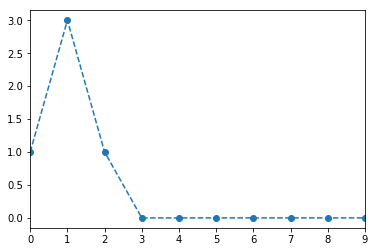

In [54]:
Series(error_history).plot(style='o--')

# Scikit Learn

In [55]:
붓꽃 = pd.read_csv('data/iris.data', header=None)

In [56]:
붓꽃[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
len(붓꽃)

150

In [58]:
data = 붓꽃[:100]

In [59]:
X = data.iloc[:, 0:4]

In [60]:
X[:5]

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
y = data[4]

In [62]:
y[:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 4, dtype: object

In [63]:
y.value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

훈련/테스트 데이터 분리

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [66]:
len(X)

100

In [67]:
len(X_train)

70

In [68]:
len(X_test)

30

In [69]:
from sklearn.linear_model import Perceptron

모델 설정

In [70]:
model = Perceptron(eta0=0.1, n_iter=40)

모델 훈련

In [71]:
model.fit(X_train, y_train)

/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

학습결과 설정된 매개변수

In [72]:
w = model.coef_
b = model.intercept_

In [73]:
w

array([[-0.16, -0.87,  1.08,  0.46]])

In [74]:
b

array([-0.1])

새로운 데이터에 대해 예측하기

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred[:5]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor'],
      dtype='<U15')

예측된 결과 평가하기

In [77]:
(y_test.values == y_pred).sum() / len(y_test)

1.0

In [78]:
model.score(X_test, y_test)

1.0

In [79]:
model.loss_function

/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function loss_function is deprecated; Attribute loss_function was deprecated in version 0.19 and will be removed in 0.21. Use ``loss_function_`` instead
  warnings.warn(msg, category=DeprecationWarning)


"왜 잘 될까?"

In [80]:
X[:3]

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [81]:
from plot_util import get_colormap

In [82]:
colormap = get_colormap(y)

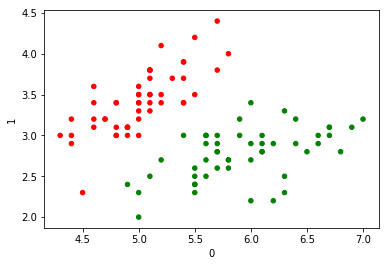

In [83]:
X.plot(kind='scatter', x=0, y=1, c=colormap)

#### 연습

붓꽃 데이터의 나머지 두 라벨에 대해 퍼셉트론 모델을 훈련하고 평가합니다.

In [84]:
data = 붓꽃[50:]

In [85]:
len(data)

100

In [86]:
y = data[4]

In [87]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [88]:
X = data.iloc[:, 0:4]

In [89]:
model = Perceptron(eta0=0.1, n_iter=40)

results = []
for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3)
    
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append(score)

/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.

In [90]:
results

[0.96666666666666667,
 0.90000000000000002,
 0.93333333333333335,
 0.8666666666666667,
 0.93333333333333335]

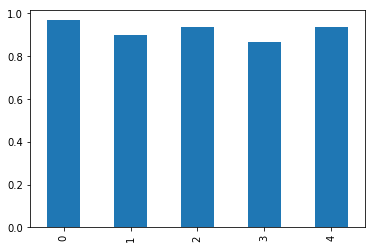

In [91]:
Series(results).plot(kind='bar')

"왜 불안정 할까?"

In [92]:
colormap = get_colormap(y)

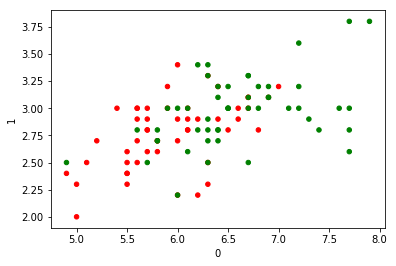

In [93]:
X.plot(kind='scatter', x=0, y=1, c=colormap)

"훈련 데이터는 백점 맞을까?"

In [94]:
model.score(X_train, y_train)

0.9285714285714286

"훈련을 더 하면 뭔가 깨닫지 않을까?"

In [95]:
훈련횟수_리스트 = list(range(10, 110, 10))
훈련횟수_리스트

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [96]:
results = []
for 훈련횟수 in 훈련횟수_리스트:
    model = Perceptron(eta0=0.1, n_iter=훈련횟수)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    results.append(score)

/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/wooyang/anaconda3/lib/python3.

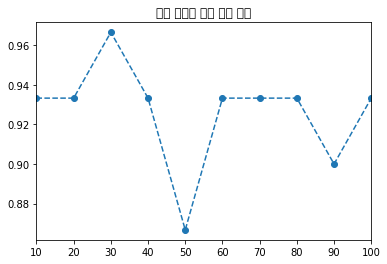

In [97]:
report = Series(results, index=훈련횟수_리스트).plot(
    style='o--', title='훈련 횟수에 따른 모델 평가')

모델 튜닝으로 한계가 있다면 모델 교체를 검토해야 합니다.

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
model = LogisticRegression()

In [100]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
model.score(X_test, y_test)

0.96666666666666667

하이퍼 파라메터, 매개변수, 모델 성능

In [102]:
C_params = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

In [103]:
results = []
for C in C_params:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_score = model.score(X_train, y_train)
    w = model.coef_
    w2sum = np.sum(w**2)
    results.append((test_score, train_score, w2sum))

In [104]:
report = DataFrame(results, index=C_params)

In [105]:
report.columns = ['test', 'train', 'w2sum']

In [106]:
report

,test,train,w2sum
0.001,0.466667,0.514286,0.000378
0.010,0.466667,0.514286,0.018522
0.100,0.900000,0.928571,1.033023
1.000,0.966667,0.957143,13.798304
10.000,0.933333,0.971429,62.158715
100.000,0.933333,0.985714,164.812233
1000.000,0.933333,0.985714,425.762442


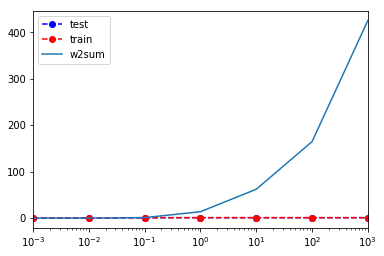

In [107]:
report.plot(style=['bo--', 'ro--'], logx=True)

In [108]:
matplotlib.rcParams['font.family'] = 'San-Serif'

/home/wooyang/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['San-Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


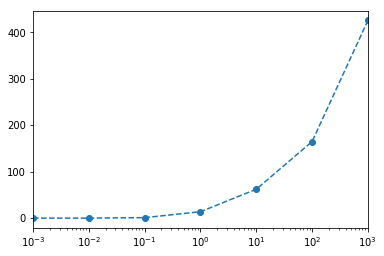

In [109]:
report['w2sum'].plot(logx=True, style='o--')

In [110]:
예측확률 = model.predict_proba(X_test)

In [111]:
DataFrame(예측확률)

,0,1
0,6.914439e-08,9.999999e-01
1,9.999976e-01,2.415637e-06
2,9.989541e-01,1.045936e-03
3,6.282530e-07,9.999994e-01
4,9.999139e-01,8.605480e-05
5,9.999970e-01,2.960198e-06
6,5.004998e-07,9.999995e-01
7,9.999919e-01,8.141927e-06
8,9.999834e-01,1.664974e-05
9,3.182385e-02,9.681762e-01


In [112]:
wine = pd.read_csv('data/wine.data')

In [113]:
wine[:5]

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [114]:
wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [115]:
y = wine['Class label']

In [116]:
X = wine.iloc[:, 1:]

In [117]:
X[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [118]:
X.shape

(178, 13)

#### 연습

퍼셉트론과 로지스틱 회귀 (LR; Logistic Regression) 모델을 같은 데이터로 훈련시키고 결과를 비교합니다.

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [120]:
model_ppn = Perceptron(n_iter=100)
model_ppn

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [121]:
model_ppn.fit(X_train, y_train)

/home/wooyang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=100, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [122]:
model_ppn.score(X_test, y_test)

0.61111111111111116

In [123]:
model_lr = LogisticRegression()
model_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
model_lr.score(X_test, y_test)

0.94444444444444442

In [126]:
model_lr.score(X_train, y_train)

0.9838709677419355

x의 문제 ...

In [127]:
X[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


단위 조정 (Scaling)

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler_min_max = MinMaxScaler()

In [130]:
X_mm = scaler_min_max.fit_transform(X)

In [131]:
DataFrame(X_mm, columns=X.columns)[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler()

In [134]:
X_std = scaler.fit_transform(X)

In [135]:
DataFrame(X_std, columns=X.columns)[:5]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
